ENTER HOW MANY TWEETS TO ANALYZE : 25


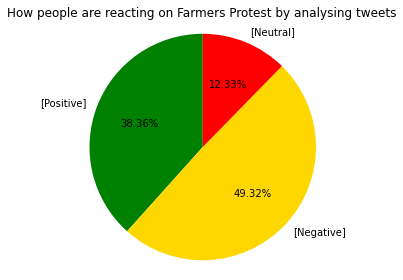

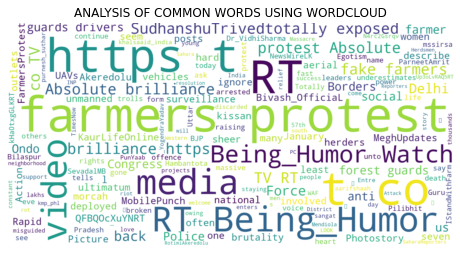

In [69]:
from textblob import TextBlob
import tweepy
import numpy as np
import itertools
import collections
import re
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

def percentage(part,whole):
  return 100 * float(part)/float(whole)


consumer_key = 'WnewnTdzOOpGxcpko2kU8Cglt'
consumer_SecretKey = '46YIvojTBRMna1wcWpuhxL5Z22kfrucwTUkVw8dZ44EQSib9Mj'

access_token = '1351464157892153344-b5wHuqygwptKLFUm96K8WvpFyhPCWP'
access_TokenSecret = 'CbwOGWAYhybR8qgfCRPsfb9aEj28iETZS3Qjbyj9eWmrA'

auth = tweepy.OAuthHandler(consumer_key,consumer_SecretKey)
auth.set_access_token(access_token,access_TokenSecret)

api = tweepy.API(auth)

search = str('Farmers Protest')
noOfsearchTerm = int(input("ENTER HOW MANY TWEETS TO ANALYZE : "))


public_tweets = tweepy.Cursor(api.search, q=search, lang="en", result_type="recent").items(noOfsearchTerm)

count=0
positive=0
negative=0
neutral=0
polarity=0

for tweet in public_tweets:
     
    analysis = TextBlob(tweet.text)
     
    polarity +=analysis.sentiment.polarity
     
    if(analysis.sentiment.polarity==0):
            neutral += 1
    elif(analysis.sentiment.polarity<0.00):
            negative += 1
    elif(analysis.sentiment.polarity>0.00):
            positive += 1

positive=percentage(positive,noOfsearchTerm)
negative=percentage(negative,noOfsearchTerm)
nutral=percentage(neutral,noOfsearchTerm)

labels=['[Positive]', '[Negative]','[Neutral]']
sizes=[positive,negative,neutral]
colors=["green","gold","red"]
chart=plt.pie(sizes,colors = colors,labels=labels, startangle=90, autopct='%.2f%%')
plt.title("How people are reacting on {} by analysing tweets".format(search))
plt.axis("equal")
plt.tight_layout()
plt.show()

#Calculate and Plot Word Frequency

public_tweets = tweepy.Cursor(api.search, q=search, lang="en", result_type="recent").items(noOfsearchTerm)



cloud = ""
for each in public_tweets:
    cloud = cloud + each.text

wordcloud = WordCloud(background_color="white",mode="RGB", width=2000 , height=1000).generate(cloud)
plt.figure(figsize=(8,8))
plt.title("ANALYSIS OF COMMON WORDS USING WORDCLOUD")
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis('off')
plt.show()








In [68]:


#Calculate and Plot Word Frequency

public_tweets = tweepy.Cursor(api.search, q=search, lang="en", result_type="recent").items(noOfsearchTerm)


all_tweets = [tweet.text for tweet in public_tweets]

all_tweets[:5]

def remove_url(txt):

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

all_tweets_no_urls[0].split()
all_tweets_no_urls[0].lower().split()
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:5]


all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])

clean_tweets_no_urls.head()




,words,count
0,rt,24
1,the,21
2,farmers,20
3,protest,15
4,of,10
